In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [34]:
dataset = datasets.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=1)

In [35]:
def adjust(dataset,d):
  for i in range(0,len(dataset[0])):
    if dataset[1][i]==1:
      dataset[0][i][1]-=d/2
    else:
      dataset[0][i][1]+=d/2
  return dataset


In [36]:
dataset
d=0.5
dataset=adjust(dataset,d) #  distance between two moons

In [37]:
X=dataset[0]
print(type(X))
X1=np.array(X)
X=pd.DataFrame(X1)
X

<class 'numpy.ndarray'>


,0,1
0,1.350769,-0.637705
1,1.620098,-0.576537
2,-0.483465,0.993868
3,1.341372,-0.594804
4,2.023108,-0.075712
...,...,...
95,1.038336,-0.805731
96,0.763211,0.786774
97,0.794781,-0.874053
98,0.821253,0.948930


In [38]:
Y=dataset[1]
Y1=np.array(Y)
Y=pd.DataFrame(Y1)
Y

,0
0,1
1,1
2,0
3,1
4,1
...,...
95,1
96,0
97,1
98,0


In [39]:
x_ind= []
y_ind= []
for x in X1:
  x_ind.append(x[0])
  y_ind.append(x[1])

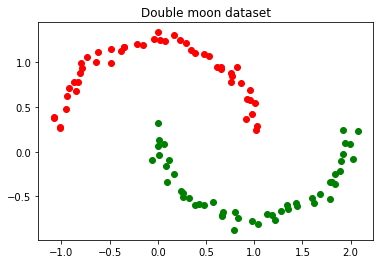

In [40]:
upper_moon_x=[]
upper_moon_y=[]
for i in range(100):
  if Y1[i]==1:
    upper_moon_x.append(x_ind[i])
    upper_moon_y.append(y_ind[i])
plt.scatter(upper_moon_x,upper_moon_y, color='g')
lower_moon_x=[]
lower_moon_y=[]
for i in range(100):
  if Y1[i]==0:
    lower_moon_x.append(x_ind[i])
    lower_moon_y.append(y_ind[i])
plt.scatter(lower_moon_x,lower_moon_y, color='r')
plt.title('Double moon dataset')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1)
Y_test=Y_test.reshape(25,1)
Y_train=Y_train.reshape(75,1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(75, 2)
(75, 1)
(25, 2)
(25, 1)


In [42]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, Y, learning_rate, n_iters):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features,1))
        self.bias = 0
        for i in range(n_iters):
            a = np.dot(X, self.weights) + self.bias
            Y_predict = self.step_function(a)
            delta_w = learning_rate * np.dot(X.T, (Y - Y_predict))
            delta_b = learning_rate * np.sum(Y - Y_predict)
            self.weights += delta_w
            self.bias += delta_b
        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

In [43]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, Y_train,learning_rate=0.001, n_iters=100)

In [44]:
print(w_trained)
print(b_trained)

[[ 0.00511802]
 [-0.05641301]]
0.008


In [45]:
x=[-2,-1,0,1,2,3,4]
a=w_trained[0]
b=w_trained[1]
c=b_trained
print(a)
print(b)
print(c)
x=np.array(x)
y=[-1*(a*i+c)/b for i in x]
y=np.array(y)
y

[0.00511802]
[-0.05641301]
0.008


array([[-0.03963699],
       [ 0.05108714],
       [ 0.14181126],
       [ 0.23253539],
       [ 0.32325952],
       [ 0.41398364],
       [ 0.50470777]])

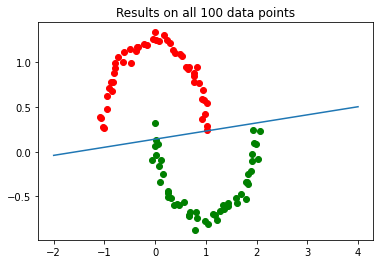

In [46]:
plt.plot(x,y)
plt.scatter(lower_moon_x,lower_moon_y, color='r')
plt.scatter(upper_moon_x,upper_moon_y, color='g')
plt.title('Results on all 100 data points')
plt.show()

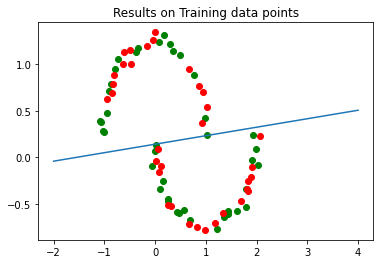

In [47]:
upper_moon_x=[]
upper_moon_y=[]
for i in range(0,len(Y_train)):
  if Y_train[i]==1:
    upper_moon_x.append(x_ind[i])
    upper_moon_y.append(y_ind[i])
plt.scatter(upper_moon_x,upper_moon_y, color='g')
lower_moon_x=[]
lower_moon_y=[]
for i in range(0,len(Y_train)):
  if Y_train[i]==0:
    lower_moon_x.append(x_ind[i])
    lower_moon_y.append(y_ind[i])
plt.scatter(lower_moon_x,lower_moon_y, color='r')
plt.plot(x,y)
plt.title('Results on Training data points')
plt.show()

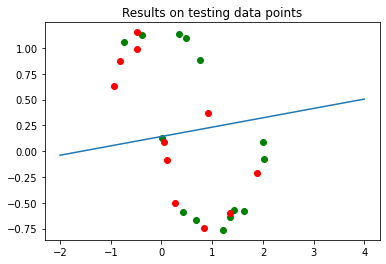

In [48]:
upper_moon_x=[]
upper_moon_y=[]
for i in range(0,len(Y_test)):
  if Y_train[i]==1:
    upper_moon_x.append(x_ind[i])
    upper_moon_y.append(y_ind[i])
plt.scatter(upper_moon_x,upper_moon_y, color='g')
lower_moon_x=[]
lower_moon_y=[]
for i in range(0,len(Y_test)):
  if Y_train[i]==0:
    lower_moon_x.append(x_ind[i])
    lower_moon_y.append(y_ind[i])
plt.scatter(lower_moon_x,lower_moon_y, color='r')
plt.plot(x,y)
plt.title('Results on testing data points')
plt.show()